<a href="https://colab.research.google.com/github/mirjanaa/Bee-Colony-Optimization/blob/main/genetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [381]:
import numpy as np
import random
import copy

In [382]:
class Individual:

  def __init__(self, bounds, obj_function, individual):
    self.code = individual.position
    self.obj_value = obj_function(self.code)
    self.fitness = self.calc_fitness()

    print("Stampa inicijalnu: ", individual.position)

  def __lt__(self, other):
    return self.fitness < other.fitness


  def calc_fitness(self):
    return 1 / (1 + self.obj_value)


In [383]:
bounds = np.array([(-5.12, 5.12), (-5.12, 5.12)])

In [392]:
def rastrigin(x):
    A = 10
    n = len(x)
    return A*n + sum(x_i**2 - A*np.cos(2*np.pi*x_i) for x_i in x)
    #return x[0]**2 + x[1]**2

In [385]:
def selection(population, tournament_size):
  TOURNAMENT_SIZE = tournament_size
  bestFitness = float('-inf')
  index = -1
  for i in range(TOURNAMENT_SIZE):
      randomIndividual = random.randrange(len(population))
      if population[randomIndividual].fitness > bestFitness:
          bestFitness = population[randomIndividual].fitness
          index = randomIndividual
  return index 

In [386]:
def crossover(parent1, parent2, child1, child2):
  
  # breakpoint = random.randrange(len(parent1.code))
    
  # child1.code[:breakpoint] = parent1.code[:breakpoint]
  # child2.code[:breakpoint] = parent2.code[:breakpoint]
  
  # child1.code[breakpoint:] = parent2.code[breakpoint:]
  # child2.code[breakpoint:] = parent1.code[breakpoint:]

  for i in range(len(parent1.code)):
    child1.code[i] = (parent1.code[i] + parent2.code[i]) / 2
    if random.random() < 0.5:
      child2.code[i] = parent1.code[i]
    else:
      child2.code[i] = parent2.code[i]

  if child1.calc_fitness() < parent1.fitness and child1.calc_fitness() < parent2.fitness and child2.calc_fitness() < parent1.fitness and child2.calc_fitness() < parent2.fitness:
    child1.code = parent1.code
    child2.code = parent2.code




  # print(f"Code: ${child1.code}, obj_value: ${child1.obj_value}")
  # print(f"Code: ${child1.code}, obj_value: ${child1.obj_value}")


In [387]:
def mutation(individual):
  MUTATION_PROB = 0.05
  for i in range(len(individual.code)):
      if random.random() < MUTATION_PROB:
          # print("MUTACIJA SE IZVRSAVA")
          individual.code[i] = random.uniform(bounds[i][0], bounds[i][1])
      # else:
      #   print("***********************")

In [388]:
def genetic_algorithm(population_size, generation_size, tournament_size, obj_function, initial_population):

  POPULATION_SIZE = population_size
  GENERATION_SIZE = generation_size
  ELITISIM_SIZE = POPULATION_SIZE // 5
  TOURNAMENT_SIZE = tournament_size

  population = [Individual(bounds, obj_function, initial_population[i]) for i in range(POPULATION_SIZE)]
  new_population = [Individual(bounds, obj_function, initial_population[i]) for i in range(POPULATION_SIZE)]

  fitness_values = []
  obj_values = []

  for i in range(GENERATION_SIZE):
    population.sort(reverse=True)
    new_population[:ELITISIM_SIZE] = population[:ELITISIM_SIZE]

    fitness_values.append(population[0].fitness)
    obj_values.append(population[0].obj_value)

    for j in range(ELITISIM_SIZE, POPULATION_SIZE, 2):
      index_parent1 = selection(population, TOURNAMENT_SIZE)
      index_parent2 = selection(population, TOURNAMENT_SIZE)

      crossover(population[index_parent1], population[index_parent2], new_population[j], new_population[j+1])

      mutation(new_population[j])
      mutation(new_population[j+1])

      new_population[j].fitness = new_population[j].calc_fitness()
      new_population[j+1].fitness = new_population[j+1].calc_fitness()

    population = new_population

  best_individual = max(population) 
  print(f"Best individual: ${best_individual.code}, obj_value: ${best_individual.obj_value}")

  return best_individual, obj_values, fitness_values






In [389]:
#result = genetic_algorithm(250, 1000, 5, rastrigin)
#print("Best solution: ", result.code)

## Compare genetic to abc algorithm


In [390]:
import random
import numpy as np
from matplotlib import pyplot as plt




class FoodSource:
  def __init__(self, bounds, obj_function):
    self.position = np.array([random.uniform(bound[0], bound[1]) for bound in bounds])
    self.obj_value = obj_function(self.position)
    self.fitness = self.calculate_fitness()
    self.trial = 0
    self.probability = 0

    print("Stampam u abc******: ", self.position)

  def __lt__(self, other):
    return self.obj_value < other.obj_value

  def __gt__(self, other):
    return self.fitness > other.fitness

  def calculate_fitness(self):
    if self.obj_value >= 0:
      return 1 / (1 + self.obj_value)
    return 1 + abs(self.obj_value) 
    
    
bounds = np.array([(-5.12, 5.12), (-5.12, 5.12)])



def generate_new_solution(i, population, lb, ub, obj_function):

  j = random.randrange(len(bounds))
  partner = random.randrange(len(population))

  while i == partner:
    partner = random.randrange(len(population))

  phi = random.uniform(-1, 1)

  old_fitness = population[i].fitness
  old_objective_value = population[i].obj_value

  old_j = population[i].position[j]
  new_j = population[i].position[j] + phi * (population[i].position[j] - population[partner].position[j])

  population[i].position[j] = new_j
  population[i].position[j] = np.clip(population[i].position[j], lb[j], ub[j])
  
  new_objective_value = obj_function(population[i].position)
   
  population[i].obj_value = new_objective_value
  population[i].fitness = population[i].calculate_fitness()

  if population[i].fitness > old_fitness:
    population[i].trial = 0
  
  else:
    population[i].position[j] = old_j
    population[i].obj_value = old_objective_value
    population[i].fitness = old_fitness
    population[i].trial = population[i].trial + 1 

    
    
    
def ABC_algorithm(population_size, num_of_iters, limit, obj_function):

  POPULATION_SIZE = population_size
  NUM_OF_ITERATIONS = num_of_iters
  LIMIT = limit

  lower_bound = np.array([x[0] for x in bounds])
  upper_bound = np.array([x[1] for x in bounds])


  population = [FoodSource(bounds, obj_function) for _ in range(POPULATION_SIZE)]
  initial_population = copy.deepcopy(population)

  best_solution = min(population)

  obj_values = []
  fitness_values = []

  for k in range(NUM_OF_ITERATIONS):
    #### Employed Bee Phase ####
    for i in range(POPULATION_SIZE):
      generate_new_solution(i, population, lower_bound, upper_bound, obj_function)

    #### Onlooker Bee Phase ####
    max_fitness = max([population[i].fitness for i in range(POPULATION_SIZE)])
    for i in range(POPULATION_SIZE):
      population[i].probability = 0.9 * (population[i].fitness / max_fitness) + 0.1


    m = 0
    n = 0

    while m < POPULATION_SIZE and n < POPULATION_SIZE:
      rand_value = random.uniform(0, 1)
      if rand_value < population[n].probability:
        generate_new_solution(n, population, lower_bound, upper_bound, obj_function)
        m += 1
      n = (n % POPULATION_SIZE) + 1

    best_solution = min(min(population), best_solution)

    #### Scout Bee Phase ####
    max_index = -1
    max_trial = float('-inf')
    for index, p in enumerate(population):
      if p.trial > max_trial:
        max_trial = p.trial
        max_index = index


    if population[max_index].trial > LIMIT:
      population[max_index] = FoodSource(bounds, obj_function)

    best_solution = min(min(population), best_solution)

    obj_values.append(best_solution.obj_value)
    fitness_values.append(best_solution.fitness)

  print("position: ", [i for i in best_solution.position])
  print("objective value: ", best_solution.obj_value)
  print("fitness value: ", best_solution.fitness)

  #plt.plot(range(NUM_OF_ITERATIONS), obj_values)
  #plt.plot(range(NUM_OF_ITERATIONS), fitness_values)
  return best_solution, obj_values, fitness_values, initial_population
    
    
    

Streaming output truncated to the last 5000 lines.
Stampa inicijalnu:  [1.00661094 4.48175902]
Stampa inicijalnu:  [0.55744512 4.98855936]
Stampa inicijalnu:  [ 3.11675315 -1.07557032]
Stampa inicijalnu:  [-1.58358006  3.84278846]
Stampa inicijalnu:  [0.34156171 5.09513357]
Stampa inicijalnu:  [3.9141246  1.03495427]
Stampa inicijalnu:  [1.68311146 5.02407112]
Stampa inicijalnu:  [3.2139569  2.33948618]
Stampa inicijalnu:  [ 0.58180922 -1.49487923]
Stampa inicijalnu:  [ 2.39161001 -3.64689994]
Stampa inicijalnu:  [ 2.70469371 -2.90713776]
Stampa inicijalnu:  [-0.63535531 -4.30343962]
Stampa inicijalnu:  [-0.19016579 -5.08264044]
Stampa inicijalnu:  [-1.43804699 -4.19404292]
Stampa inicijalnu:  [-1.74023623  3.61214938]
Stampa inicijalnu:  [ 4.97670975 -0.96492235]
Stampa inicijalnu:  [-4.62232997  3.92007586]
Stampa inicijalnu:  [-4.37114923  3.87909457]
Stampa inicijalnu:  [ 3.90121437 -0.43733906]
Stampa inicijalnu:  [-3.15838311  2.58567281]
Stampa inicijalnu:  [-1.6503788  -0.71675

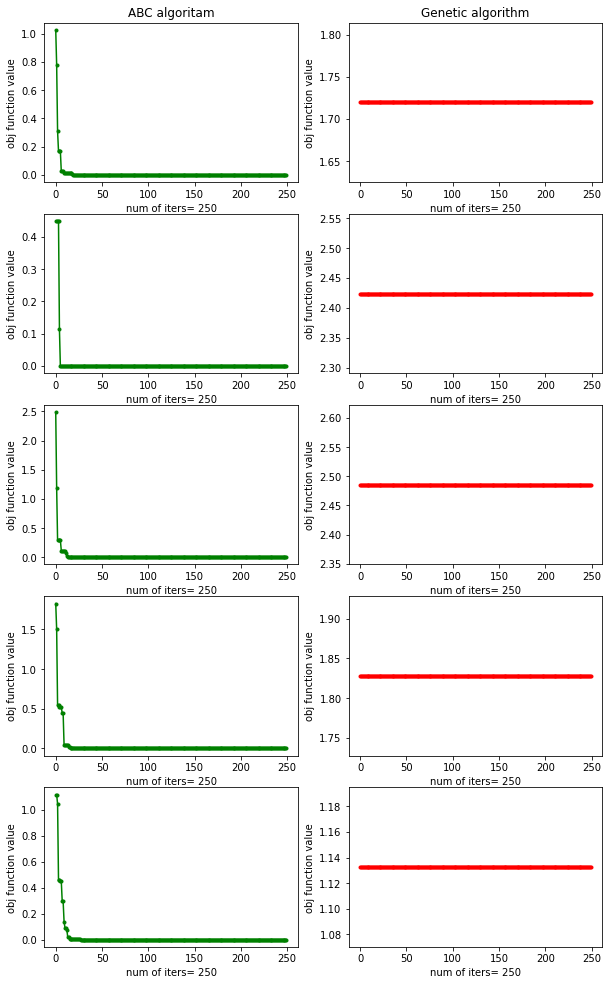

In [393]:
population_size = [1000]
num_iters = [250]
limit = [2]

tmp=5

plt.figure(figsize=(10, 17))

p = random.sample(population_size, k=1)[0]
n = random.sample(num_iters, k=1)[0]
l = random.sample(limit, k=1)[0]
t = random.sample(range(10), k=1)[0]

_, obj_values, fitness, initial_population = ABC_algorithm(p, n, l, rastrigin)
plt.subplot(tmp, 2, 1)
plt.plot(range(n), obj_values, color='green', marker='.')
plt.xlabel("num of iters= " + str(n))
plt.ylabel("obj function value")
plt.title('ABC algoritam')

_, obj_values, fitness = genetic_algorithm(p, n, t, rastrigin, initial_population)
plt.subplot(tmp, 2, 2)
plt.plot(range(n), obj_values, color='red', marker='.')
plt.xlabel("num of iters= " + str(n))
plt.ylabel("obj function value")
plt.title('Genetic algorithm')

for i in range(1, tmp):
  p = random.sample(population_size, k=1)[0]
  n = random.sample(num_iters, k=1)[0]
  l = random.sample(limit, k=1)[0]

  _, obj_values, fitness, initial_population = ABC_algorithm(p, n, l, rastrigin)
  plt.subplot(tmp, 2, 2*i+1)
  plt.plot(range(n), obj_values, color='green', marker='.')
  plt.xlabel("num of iters= " + str(n))
  plt.ylabel("obj function value")

  best_solution, obj_values, fitness = genetic_algorithm(p, n, t, rastrigin, initial_population)
  plt.subplot(tmp, 2, 2*i+2)
  plt.plot(range(n), obj_values, color='red', marker='.')
  plt.xlabel("num of iters= " + str(n))
  plt.ylabel("obj function value")

plt.show()